In [1]:
import sys
import sklearn
import matplotlib
import numpy as np
import pandas as pd

print('Python: {}'.format(sys.version))
print('Pandas: {}'.format(pd.__version__))
print('Sklearn: {}'.format(sklearn.__version__))
print('Matplotlib: {}'.format(matplotlib.__version__))
print('Numpy: {}'.format(np.__version__))

Python: 3.7.6 (default, Jan  8 2020, 19:59:22) 
[GCC 7.3.0]
Pandas: 1.0.1
Sklearn: 0.22.1
Matplotlib: 3.1.3
Numpy: 1.18.1


In [2]:
from sklearn import datasets

#local dataset
iris = datasets.load_iris()
features = iris.data
target = iris.target

#generate a pandas dataframe
df = pd.DataFrame(features)
df.columns = iris.feature_names

In [3]:
#print some of the values
print(target)
iris.target_names

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
print(df.head(5))

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [5]:
print(df.describe())

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


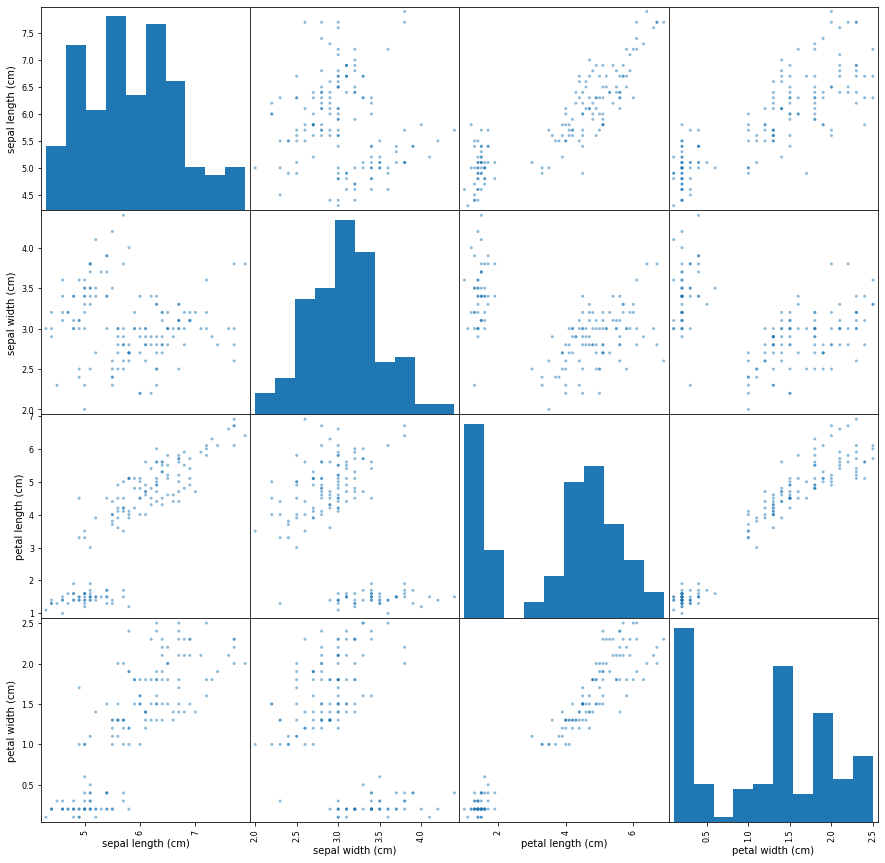

In [6]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

#display scatter plot
scatter_matrix(df, figsize=(15, 15))
plt.show()


In [7]:
#elbow method to determine the optimal number pf clusters
from sklearn.cluster import KMeans

X = []
Y = []

for i in range(1, 31):
    
    #initialize and fit the KMeans
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df)
    
    #append the number of clusters of X list
    X.append(i)
    
    #append the average within the clusters to Y list
    avg_inertia = kmeans.inertia_ / df.shape[0]
    Y.append(avg_inertia)
    

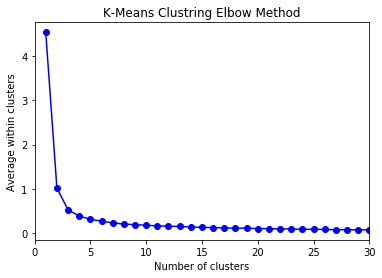

In [8]:
#plot the X and Y data
plt.plot(X, Y, 'bo-')
plt.xlim((0, 30))
plt.xlabel('Number of clusters')
plt.ylabel('Average within clusters')
plt.title('K-Means Clustring Elbow Method')

#Display the plot
plt.show()

 # Principle Component Analysis

In [9]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [10]:
#perform the PCA
pca = PCA(n_components=2)
pc = pca.fit_transform(df)

#print new dimensions
#print(pc.shape)
print(pc[:10])

[[-2.68412563  0.31939725]
 [-2.71414169 -0.17700123]
 [-2.88899057 -0.14494943]
 [-2.74534286 -0.31829898]
 [-2.72871654  0.32675451]
 [-2.28085963  0.74133045]
 [-2.82053775 -0.08946138]
 [-2.62614497  0.16338496]
 [-2.88638273 -0.57831175]
 [-2.6727558  -0.11377425]]


In [11]:
#fit the KMneans model with new features
kmeans = KMeans(n_clusters=3)
kmeans.fit(pc)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

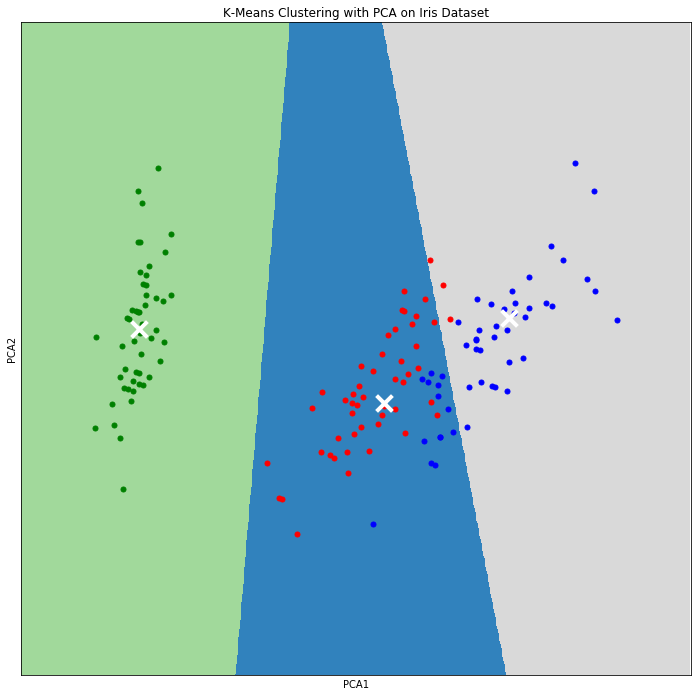

In [12]:
#visualize high dimensional clusters

#set size for the mesh
h = 0.01

#generate mesh grid
xmin, xmax = pc[:, 0].min() - 1, pc[:, 0].max() + 1
ymin, ymax = pc[:, 1].min() - 1, pc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(xmin, xmax, h), np.arange(ymin, ymax, h))

#label each point in mesh using last trained model
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

#generate color plots from the results
Z = Z.reshape(xx.shape)
plt.figure(figsize=(12, 12))
plt.clf()
plt.imshow(Z, interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()),
            cmap = plt.cm.tab20c, aspect = 'auto', origin = 'lower')

#plot the principle components on the color map
for i, point in enumerate(pc):
    if target[i] == 0:
        plt.plot(point[0], point[1], 'g.', markersize = 10)
    if target[i] == 1:
        plt.plot(point[0], point[1], 'r.', markersize = 10)
    if target[i] == 2:
        plt.plot(point[0], point[1], 'b.', markersize = 10)

#plot the cluster centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker = 'x', s = 250,
           linewidth = 4, color = 'w', zorder = 10)

#set plot title and limits
plt.title('K-Means Clustering with PCA on Iris Dataset')
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.xticks(())
plt.yticks(())

#show the plot
plt.show()
        

* Homogeneity: Meassure whether or not all the points in a cluster belong to the same class
* Completeness: Meassure if all the points of a class belong to that cluster
* V-Meassure: The hormonic mean betwee homogeneity and completeness

In [13]:
from sklearn import metrics

#kmeans on full data
kmeans_full = KMeans(n_clusters=3)
kmeans_full.fit(features)

#kmeans on PCA reduced data
kmeans_pca = KMeans(n_clusters=3)
kmeans_pca.fit(pc)

#print metrics for non-reduced data
print('Non-reduced data')
print('Homogeneity {}'.format(metrics.homogeneity_score(target, kmeans_full.labels_)))
print('Completeness {}'.format(metrics.completeness_score(target, kmeans_full.labels_)))
print('V-Meassure {}'.format(metrics.v_measure_score(target, kmeans_full.labels_)))

#print metrics for PCA reduced data
print('PCA reduced data')
print('Homogeneity {}'.format(metrics.homogeneity_score(target, kmeans_pca.labels_)))
print('Completeness {}'.format(metrics.completeness_score(target, kmeans_pca.labels_)))
print('V-Meassure {}'.format(metrics.v_measure_score(target, kmeans_pca.labels_)))


Non-reduced data
Homogeneity 0.7514854021988338
Completeness 0.7649861514489815
V-Meassure 0.7581756800057784
PCA reduced data
Homogeneity 0.7364192881252849
Completeness 0.7474865805095324
V-Meassure 0.7419116631817836


In [14]:
#compare further and print out actual labels

print(kmeans_full.labels_)
print(kmeans_pca.labels_)
print(target)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [15]:
#perform PCA
pca3 = PCA(n_components=3)
pc3 = pca3.fit_transform(df)

#print new dimensions
#print(pc.shape)
print(pc3[:10])

[[-2.68412563  0.31939725 -0.02791483]
 [-2.71414169 -0.17700123 -0.21046427]
 [-2.88899057 -0.14494943  0.01790026]
 [-2.74534286 -0.31829898  0.03155937]
 [-2.72871654  0.32675451  0.09007924]
 [-2.28085963  0.74133045  0.16867766]
 [-2.82053775 -0.08946138  0.25789216]
 [-2.62614497  0.16338496 -0.02187932]
 [-2.88638273 -0.57831175  0.02075957]
 [-2.6727558  -0.11377425 -0.19763272]]


In [16]:
#kmeans on non-reduced 4 feature data
kmeans_f4 = KMeans(n_clusters=3)
kmeans_f4.fit(features)


#kmeans on PCA reduced 3 feature data
kmeans_f3 = KMeans(n_clusters=3)
kmeans_f3.fit(pc3)

#kmeans on PCA reduced 2 feature data
kmeans_f2 = KMeans(n_clusters=3)
kmeans_f2.fit(pc)

#print metrics for non-reduced data
print('Non-reduced data')
print('Homogeneity {}'.format(metrics.homogeneity_score(target, kmeans_f4.labels_)))
print('Completeness {}'.format(metrics.completeness_score(target, kmeans_f4.labels_)))
print('V-Meassure {}'.format(metrics.v_measure_score(target, kmeans_f4.labels_)))
print('\n')
#print metrics for PCA reduced 3 feature data
print('PCA reduced 3 features data')
print('Homogeneity {}'.format(metrics.homogeneity_score(target, kmeans_f3.labels_)))
print('Completeness {}'.format(metrics.completeness_score(target, kmeans_f3.labels_)))
print('V-Meassure {}'.format(metrics.v_measure_score(target, kmeans_f3.labels_)))
print('\n')
#print metrics for PCA reduced 2 feature data
print('PCA reduced 2 features data')
print('Homogeneity {}'.format(metrics.homogeneity_score(target, kmeans_f2.labels_)))
print('Completeness {}'.format(metrics.completeness_score(target, kmeans_f2.labels_)))
print('V-Meassure {}'.format(metrics.v_measure_score(target, kmeans_f2.labels_)))



Non-reduced data
Homogeneity 0.7514854021988339
Completeness 0.7649861514489816
V-Meassure 0.7581756800057786


PCA reduced 3 features data
Homogeneity 0.7514854021988339
Completeness 0.7649861514489816
V-Meassure 0.7581756800057786


PCA reduced 2 features data
Homogeneity 0.736419288125285
Completeness 0.7474865805095325
V-Meassure 0.7419116631817838
